In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
training_set=pd.read_csv('goog.csv')
training_set



,date,open,high,low,close,volume,adj_close
0,2014-02-03,1179.20,1212.87,1128.02,1203.79,2409900,1203.79
1,2014-01-02,1115.46,1186.54,1082.27,1180.97,2860800,1180.97
2,2013-12-02,1063.51,1121.00,1049.02,1120.71,1675400,1120.71
3,2013-11-01,1031.79,1068.00,1005.00,1059.59,1372400,1059.59
4,2013-10-01,880.25,1041.52,842.98,1030.58,2472300,1030.58
...,...,...,...,...,...,...,...
93,2006-05-01,418.47,419.44,360.57,371.82,8360000,371.82
94,2006-04-03,389.53,450.72,387.93,417.94,10143900,417.94
95,2006-03-01,368.56,399.00,331.55,390.00,14925400,390.00
96,2006-02-01,389.03,406.50,337.83,362.62,17734800,362.62


In [3]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       98 non-null     object 
 1   open       98 non-null     float64
 2   high       98 non-null     float64
 3   low        98 non-null     float64
 4   close      98 non-null     float64
 5   volume     98 non-null     int64  
 6   adj_close  98 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 5.5+ KB


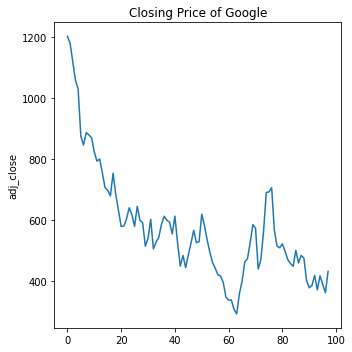

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.subplots_adjust(top=1.25, bottom=1.2)
training_set['adj_close'].plot()
plt.ylabel('adj_close')
plt.xlabel(None)
plt.title(f"Closing Price of Google")
plt.tight_layout()

Text(0.5, 1.0, 'Sales Volume')

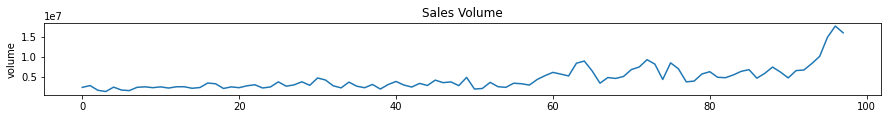

In [5]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)
training_set['volume'].plot()
plt.ylabel('volume')
plt.xlabel(None)
plt.title(f"Sales Volume")

In [6]:
training_set=training_set.iloc[:,1:2].values

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
training_set=sc.fit_transform(training_set)

X_train= training_set[0:96]
y_train= training_set[1:97]

X_train=np.reshape(X_train, (96 , 1 , 1))

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [9]:
regressor = Sequential()

regressor.add(LSTM(units=4, activation= 'sigmoid', input_shape= (None,1)))

regressor.add(Dense( units=1 ))

regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
3/3 [==============================] - 1s 4ms/step - loss: 0.1455
Epoch 2/200
3/3 [==============================] - 0s 3ms/step - loss: 0.1402
Epoch 3/200
3/3 [==============================] - 0s 3ms/step - loss: 0.1350
Epoch 4/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1302
Epoch 5/200
3/3 [==============================] - 0s 5ms/step - loss: 0.1252
Epoch 6/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1204
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1159
Epoch 8/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1116
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1074
Epoch 10/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1033
Epoch 11/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0995
Epoch 12/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0958
Epoch 13/200
3/3 [==============================] - 0s 4ms/st

3/3 [==============================] - 0s 4ms/step - loss: 0.0345
Epoch 105/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0344
Epoch 106/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0344
Epoch 107/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0343
Epoch 108/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0343
Epoch 109/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0342
Epoch 110/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0342
Epoch 111/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0342
Epoch 112/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0341
Epoch 113/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0341
Epoch 114/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0340
Epoch 115/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0340
Epoch 116/200
3/3 [==============================] - 0

In [10]:
test_set = pd.read_csv('goog.csv')
real_stock_price = test_set.iloc[:,1:2].values

inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (-1 , 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

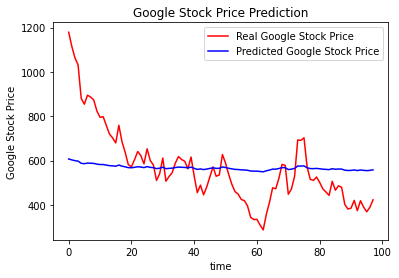

In [11]:
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot( predicted_stock_price , color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()